### Mahir Sarfati

### Data

In [74]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
url="https://raw.githubusercontent.com/globalaihub/introduction-to-machine-learning/main/Final%20Project/winequality.csv"
df=pd.read_csv(url)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Exploratory Data Analysis

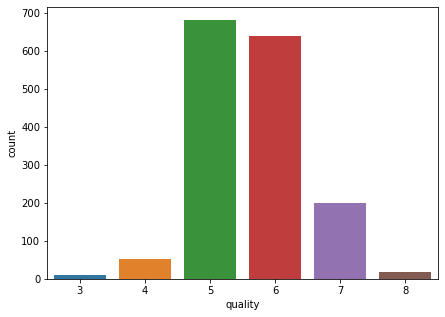

In [14]:
# EDA using label distribution (countplot)
plt.figure(figsize=(7, 5))
sns.countplot(x ='quality', data = df)
plt.show()

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

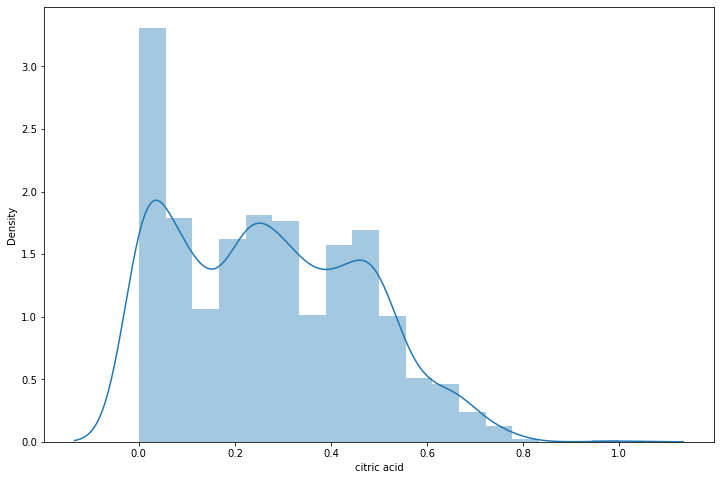

In [96]:
#EDA using distplot
plt.figure(figsize=(12, 8))
sns.distplot(df["citric acid"])

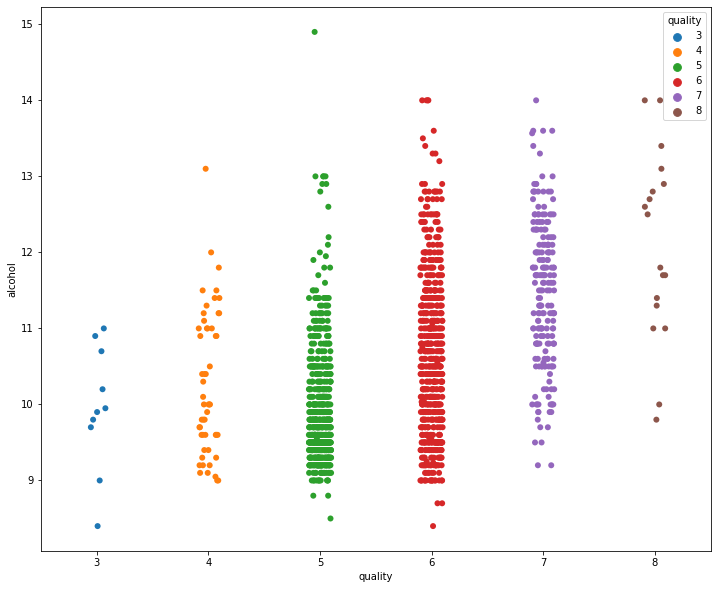

In [43]:
#EDA using stripplot
plt.subplots(figsize =(12,10))
sns.stripplot(x="quality",y="alcohol", hue="quality",data=df, size=6)
plt.show()

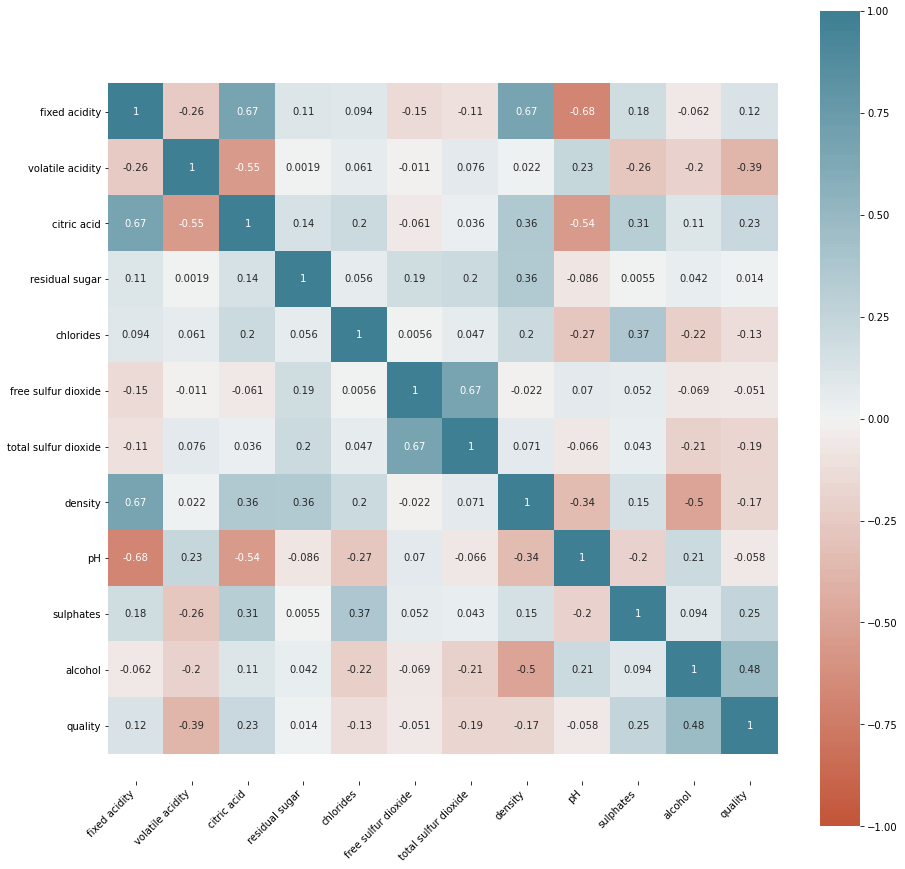

In [45]:
# EDA using Heatmap (The correlations of each feature) 

corr = df.corr()

plt.figure(figsize=(15, 15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);


### Observations from the EDA
* From the heatmap it can be seen that alcohol has a great impact on the quality of wine.
* Items "fixed acidity-citric acid" and "fixed acidity-density" have strong positive correlation. Items "fixed acidity-pH", 
"volatile acidity-citric acid" and "volatile acidity-pH" have strong negative correlation.

### Data Preprocessing

In [46]:
# Checking for the missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [47]:
df.isin(['?']).sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [50]:
from scipy import stats
z = np.abs(stats.zscore(df))
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

148

In [54]:
new_df = df.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

X = new_df.drop(['quality'], axis = 1) 
y = new_df[['quality']] 


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1447,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1448,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1449,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


(      index  fixed acidity  volatile acidity  citric acid  residual sugar  \
 0         0            7.4             0.700         0.00             1.9   
 1         1            7.8             0.880         0.00             2.6   
 2         2            7.8             0.760         0.04             2.3   
 3         3           11.2             0.280         0.56             1.9   
 4         4            7.4             0.700         0.00             1.9   
 ...     ...            ...               ...          ...             ...   
 1446   1594            6.2             0.600         0.08             2.0   
 1447   1595            5.9             0.550         0.10             2.2   
 1448   1596            6.3             0.510         0.13             2.3   
 1449   1597            5.9             0.645         0.12             2.0   
 1450   1598            6.0             0.310         0.47             3.6   
 
       chlorides  free sulfur dioxide  total sulfur dioxide  d

In [57]:
#Feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[0.00000000e+00, 2.82352941e-01, 6.30434783e-01, ...,
        7.24137931e-01, 2.77108434e-01, 1.76470588e-01],
       [6.25782228e-04, 3.29411765e-01, 8.26086957e-01, ...,
        3.67816092e-01, 4.21686747e-01, 2.54901961e-01],
       [1.25156446e-03, 3.29411765e-01, 6.95652174e-01, ...,
        4.36781609e-01, 3.85542169e-01, 2.54901961e-01],
       ...,
       [9.98748436e-01, 1.52941176e-01, 4.23913043e-01, ...,
        6.20689655e-01, 5.06024096e-01, 4.90196078e-01],
       [9.99374218e-01, 1.05882353e-01, 5.70652174e-01, ...,
        7.93103448e-01, 4.57831325e-01, 3.33333333e-01],
       [1.00000000e+00, 1.17647059e-01, 2.06521739e-01, ...,
        5.86206897e-01, 3.97590361e-01, 4.90196078e-01]])

In [60]:
#Train and Test Split
from sklearn.model_selection import train_test_split, cross_validate
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=16)
((X_train.shape),(X_test.shape))

((1015, 12), (436, 12))

### Observations from the data preprocessing
* There is no missing value in the raw data so no treatment is done for missing values.
* There is no "?" mark in the raw data so no treatment is done.
* We applied Z-score method to find the outliers. We found that there are 148 data instances which are greater or equal to  𝜇∓3𝜎,  are considered as outlier. These 148 data instances are removed from the original data. The original data has 1599 rows and after the elimination of the outliers, the new data has 1451 rows.
* We scale the features using the linear scaling method. They all scaled between [0,1].

### ML Application
* Decision Tree
* Logistic Regression
* Support Vector Machine

Accuracy of train: 0.6394088669950739
Accuracy of test: 0.5756880733944955
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.62      0.72      0.67       183
           6       0.58      0.53      0.55       192
           7       0.37      0.39      0.38        46
           8       0.00      0.00      0.00         4

    accuracy                           0.58       436
   macro avg       0.31      0.33      0.32       436
weighted avg       0.55      0.58      0.56       436

Accuracy = 0.5756880733944955
Precision = 0.3134855298051424
Recall = 0.32768026847232123
F1 Score = 0.31969191270860076


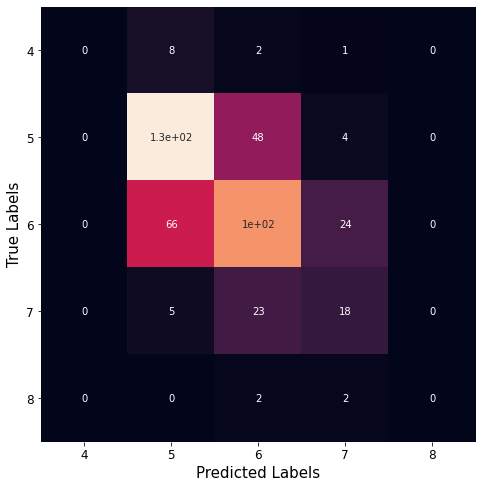

In [75]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=17)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

# Classification 
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

# Metrics
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(np.unique(y), fontsize = 12)
ax.yaxis.set_ticklabels(np.unique(y), fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

Mean training accuracy: 0.5960272992267547
Test accuracy: 0.6032110091743119 

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.62      0.75      0.68       183
           6       0.59      0.58      0.59       192
           7       0.52      0.33      0.40        46
           8       0.00      0.00      0.00         4

    accuracy                           0.60       436
   macro avg       0.35      0.33      0.33       436
weighted avg       0.58      0.60      0.59       436

Accuracy = 0.6032110091743119
Precision = 0.34671030794763047
Recall = 0.330569167260632
F1 Score = 0.3331305446617388


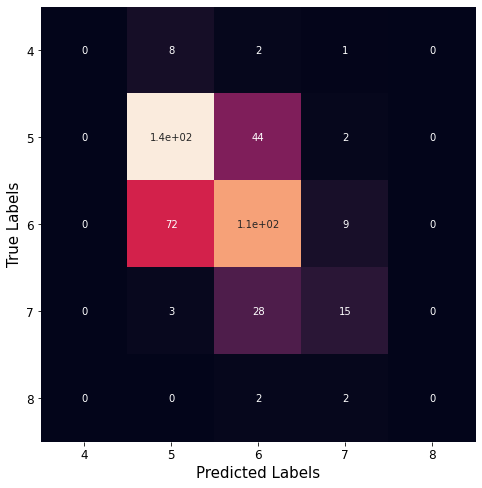

In [91]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=17, n_jobs=-1)
cv = cross_validate(log_reg,X_train,y_train, cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)),"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test, cv["estimator"][0].predict(X_test)))
log_pred = cv["estimator"][0].predict(X_test)

# Metrics
print("Accuracy = {}".format(accuracy_score(y_test, log_pred)))
print("Precision = {}".format(precision_score(y_test, log_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, log_pred, average='macro')))
print("F1 Score = {}".format(f1_score(y_test, log_pred,average='macro')))


log_cm = confusion_matrix(y_test, log_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(log_cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(np.unique(y), fontsize = 12)
ax.yaxis.set_ticklabels(np.unique(y), fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

Accuracy of train: 0.6729064039408867
Accuracy of test: 0.6307339449541285 

Accuracy = 0.6307339449541285
Precision = 0.35234782926205865
Recall = 0.34998886315039196
F1 Score = 0.34850020601297527


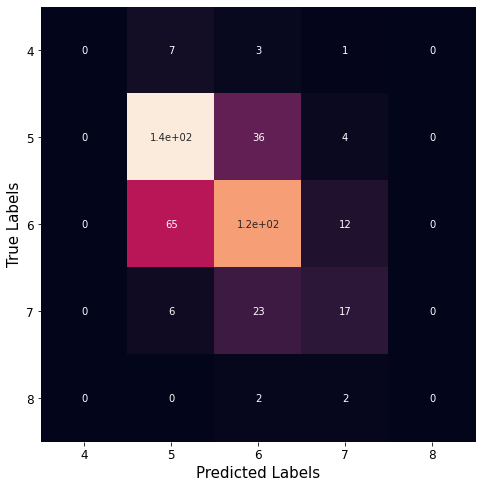

In [90]:
from sklearn.svm import SVC
svm_model = SVC(random_state = 13)
svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)
print("Accuracy of train:",svm_model.score(X_train,y_train))
print("Accuracy of test:",svm_model.score(X_test,y_test),"\n")

# Metrics
print("Accuracy = {}".format(accuracy_score(y_test, svm_pred)))
print("Precision = {}".format(precision_score(y_test, svm_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, svm_pred, average='macro')))
print("F1 Score = {}".format(f1_score(y_test, svm_pred,average='macro')))

# Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(svm_cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(np.unique(y), fontsize = 12)
ax.yaxis.set_ticklabels(np.unique(y), fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

### Evaluation

In [95]:
print("Test Accuracy of the Decision Tree = {}".format(accuracy_score(y_test, pred)))
print("Test Accuracy for Logistic Regression = {}".format(accuracy_score(y_test, log_pred)))
print("Test Accuracy of the SVM Algorithm = {}".format(accuracy_score(y_test, svm_pred)))


Test Accuracy of the Decision Tree = 0.5756880733944955
Test Accuracy for Logistic Regression = 0.6032110091743119
Test Accuracy of the SVM Algorithm = 0.6307339449541285


We observed that the highest test accuracy is achieved in support-vector machine algoritm. It is the best model to use in this dataset.